# Criando um agente

## Entendendo a estrutura do Markdown

In [1]:
# ============================================================
# Instalação das dependências necessárias para o projeto
# ============================================================

# pydantic-ai-slim[tavily] -> versão otimizada do Pydantic AI,
# usada para integração com LLMs e validação de dados estruturados.
%pip install pydantic-ai-slim[tavily]

# docling -> biblioteca para conversão e extração de texto de documentos
# (PDFs, CSVs, etc.) em formatos utilizáveis como Markdown.
%pip install docling

# fastembed -> gera embeddings de texto de forma eficiente,
# usados para busca semântica e recuperação de informações.
%pip install fastembed

# qdrant-client -> cliente Python para o banco vetorial Qdrant,
# que permite armazenar e consultar embeddings de maneira otimizada.
%pip install qdrant-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.4/144.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.3/164.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 2.7 MB/s eta 0:00:00
   ━━━━

In [2]:
# ============================================================
# Recupera a chave da API do Google Gemini no ambiente Colab
# ============================================================

from google.colab import userdata

# Obtém a chave da API salva no Colab (deve estar configurada previamente).
# Essa chave será usada para autenticar chamadas ao modelo Gemini.
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

In [3]:
# ============================================================
# Define a chave da API Gemini como variável de ambiente
# ============================================================

import os

# Armazena a chave do Gemini em uma variável de ambiente do sistema.
# Isso permite que outras bibliotecas (como o pydantic-ai)
# acessem a chave automaticamente sem precisar passá-la diretamente no código.
os.environ['GEMINI_API_KEY'] = GEMINI_API_KEY

In [4]:
# ============================================================
# Configuração inicial do agente Pydantic AI
# ============================================================

# Importa a classe Agent do pydantic-ai,
# que será usada para criar um agente conectado ao modelo Gemini.
from pydantic_ai import Agent

# O nest_asyncio permite rodar código assíncrono (async/await)
# dentro do Jupyter/Colab sem conflitos de loop de eventos.
import nest_asyncio
nest_asyncio.apply()

In [5]:
# ============================================================
# Criação do agente para geração de apresentações
# ============================================================

agent = Agent(
    # Define o modelo da Google Gemini que será utilizado
    'google-gla:gemini-2.0-flash',

    # system_prompt -> instruções fixas para orientar o modelo.
    # Neste caso, o agente deve sempre gerar uma apresentação
    # no formato Markdown compatível com reveal.js.
    system_prompt='''
    Você é um criador de apresentações que cria apresentações neste formato:
    ---
title: "Habits"
author: "John Doe"
format: revealjs
---

## Getting up

- Turn off alarm
- Get out of bed

## Going to sleep

- Get in bed
- Count sheep

Ao receber um tema crie a apresentação.
    ''',
)

In [6]:
# ============================================================
# Execução do agente para gerar a apresentação
# ============================================================

# O método run_sync executa o agente de forma síncrona,
# passando o tema "Indústria de petshops".
# O modelo Gemini irá gerar uma apresentação no formato definido no system_prompt.
result = agent.run_sync('Indústria de petshops')

In [9]:
print(result.output)

Ok, aqui está a apresentação:

---
title: "Indústria de Petshops"
author: "GPT-3"
format: revealjs
---

## Introdução

- A indústria de petshops é um mercado em crescimento
- Os donos de pets estão gastando mais dinheiro com seus animais de estimação
- As petshops estão oferecendo uma gama maior de produtos e serviços

## Mercado em crescimento

- A população de animais de estimação está crescendo
- Os donos de pets estão mais propensos a tratar seus animais como membros da família
- A indústria de petshops está se beneficiando dessas tendências

## Gastos com animais de estimação

- Os donos de pets estão gastando mais dinheiro com comida, brinquedos e outros produtos
- Eles também estão gastando mais dinheiro com serviços como consultas veterinárias, banho e tosa e adestramento
- A indústria de petshops está oferecendo uma gama maior de produtos e serviços para atender a essas necessidades

## Produtos e serviços

- As petshops estão oferecendo uma gama maior de produtos, incluindo a

## Formatando resultados

In [10]:
# ============================================================
# Importação de bibliotecas para validação e formatação
# ============================================================

# BaseModel do Pydantic -> usado para definir e validar
# a estrutura dos dados de formatação da apresentação.
from pydantic import BaseModel

# yaml -> biblioteca que permite converter dados Python
# para o formato YAML e vice-versa, útil para estruturar
# a apresentação em configurações legíveis.
import yaml  # Biblioteca para manipular YAML

In [11]:
# ============================================================
# Definição do modelo de formatação da apresentação
# ============================================================

class Formatacao(BaseModel):
    # Título da apresentação
    title: str

    # Autor da apresentação
    author: str

    # Tipo de formato da apresentação (ex.: "revealjs")
    format: str

    # Tema visual utilizado (ex.: "dark", "moon", "serif")
    theme: str

    # Define se os elementos dos slides aparecem de forma incremental
    incremental: bool

In [13]:
# ============================================================
# Criação do agente responsável pela formatação da apresentação
# ============================================================

agente_formatador = Agent(
    # Modelo Gemini utilizado
    'google-gla:gemini-2.0-flash',

    # Instruções fixas para orientar o agente
    system_prompt='''
    Você é um criador de apresentações que retorna a formatação para apresentação.
    A formatação tem o seguinte formato:
    ---
title: "Presentation"
author: "John Doe"
format:
  revealjs:
    theme: dark
    incremental: true
---

As opções de tema são:
beige
blood
dark
default
league
moon
night
serif
simple
sky
solarized

Você deve inferir quais as propriedades da formatação a partir do prompt.
''',

    # Define que a saída do agente deve ser validada
    # contra o modelo Pydantic "Formatacao".
    output_type=Formatacao
)

In [ ]:
#result = agent.run_sync('Quero uma apresentação com o tema escuro, o autor é a Gatito Petshop, e o título é Ganhos em vendas de arranhadores.')
#print(result.data)

In [14]:
# ============================================================
# Geração da formatação da apresentação baseada no prompt do usuário
# ============================================================

# O agente "agente_formatador" recebe o prompt detalhando título, autor e tema.
# Ele retorna um objeto validado pelo modelo Pydantic "Formatacao".
result = agente_formatador.run_sync(
    'Quero uma apresentação com o tema escuro, o autor é a Gatito Petshop, e o título é Ganhos em vendas de arranhadores.'
)

# Exibe o resultado da formatação retornado pelo agente
print(result.output)

title='Ganhos em vendas de arranhadores' author='Gatito Petshop' format='revealjs' theme='dark' incremental=True


In [16]:
# ============================================================
# Converte o objeto Pydantic em um dicionário Python
# ============================================================

# O método `model_dump()` do Pydantic retorna todos os campos
# do objeto "result.output" em formato de dicionário, facilitando
# manipulações posteriores, como conversão para YAML.
result.output.model_dump()

{'title': 'Ganhos em vendas de arranhadores',
 'author': 'Gatito Petshop',
 'format': 'revealjs',
 'theme': 'dark',
 'incremental': True}

In [17]:
# ============================================================
# Função para converter o objeto de formatação em YAML
# ============================================================

def formatar_para_yaml(result_data):
    """
    Recebe um objeto Pydantic (Formatacao) e converte seus campos
    em um dicionário estruturado, depois transforma em string YAML.
    """

    # Constrói o dicionário no formato esperado para apresentação
    yaml_data = {
        "title": result_data.title,       # Título da apresentação
        "author": result_data.author,     # Autor da apresentação
        "format": {
            result_data.format: {         # Tipo de formato (ex.: revealjs)
                "theme": result_data.theme,       # Tema visual
                "incremental": result_data.incremental,  # Incrementalidade
            }
        },
    }

    # Converte o dicionário para YAML
    import yaml
    return yaml.dump(
        yaml_data,
        sort_keys=False,        # Mantém a ordem dos campos como no dicionário
        default_flow_style=False # Gera o YAML no estilo legível de múltiplas linhas
    )

In [18]:
# ============================================================
# Converte o objeto de formatação em string YAML e exibe
# ============================================================

# Usa a função `formatar_para_yaml` para gerar o YAML
yaml_formatado = formatar_para_yaml(result.output)

# Exibe o YAML formatado no console
print(yaml_formatado)

title: Ganhos em vendas de arranhadores
author: Gatito Petshop
format:
  revealjs:
    theme: dark
    incremental: true



## Avaliando resultados

In [19]:
# ============================================================
# Importa ModelRetry para validação avançada do agente
# ============================================================

# ModelRetry permite que o agente tente gerar novamente a saída
# caso algum critério de validação definido pelo usuário não seja atendido.
from pydantic_ai import ModelRetry

In [ ]:
# ============================================================
# Validador de resultado do agente
# ============================================================

# Define uma função assíncrona que valida a saída do agente
# antes de retornar ao usuário. Caso o título ainda seja o
# padrão "Presentation", força o modelo a tentar novamente
# usando ModelRetry.

@agente_formatador.result_validator
async def valida_resultado(result):
    if result.title == 'Presentation':
        raise ModelRetry(f'''
        Você precisa passar um título que tenha relação com gatos
        e a apresentação de resultados semestrais da Gatito Petshop.
        ''')
    else:
        # Se o resultado estiver correto, retorna normalmente
        return result

In [ ]:
result = agente_formatador.run_sync('Quero uma apresentação com o tema escuro, o autor é a Gatito Petshop.')

In [ ]:
result.output

In [ ]:
# ============================================================
# Gera novamente o YAML formatado usando o resultado validado
# ============================================================

yaml_formatado = formatar_para_yaml(result.output)

# Exibe o YAML final, pronto para uso em apresentações reveal.js
print(yaml_formatado)

# Aplicando Agentic RAG

## Carregando documentos

In [25]:
url = 'https://raw.githubusercontent.com/allanspadini/curso-pydanticai/main/dados/Relatrio_Mensal_-_Gatito_Petshop.pdf'

In [26]:
# ============================================================
# Importa a classe DocumentConverter do Docling
# ============================================================

# DocumentConverter permite carregar e converter documentos
# de diferentes formatos (PDF, CSV, DOCX, etc.) para formatos
# utilizáveis, como texto ou Markdown, para posterior processamento.
from docling.document_converter import DocumentConverter

In [27]:
# ============================================================
# Cria um conversor de documentos e realiza a conversão
# ============================================================

# Instancia o DocumentConverter, que será usado para processar PDFs, CSVs, etc.
converter = DocumentConverter()

# Converte o documento localizado em 'url' (pode ser PDF, CSV ou DOCX)
# para um objeto manipulável pelo Docling (contendo texto extraído, metadados, etc.)
result = converter.convert(url)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [28]:
print(result.document.export_to_markdown())

## Relatório Mensal - Gatito Petshop

Período: Março/2025

## 1. Resumo Executivo

Em março de 2025, a Gatito Petshop registrou um faturamento total de R$ 127.845,00, representando um crescimento de 8,3% em relação ao mesmo período do ano anterior. A categoria de rações continua sendo nosso principal segmento de vendas 62% do faturamento), seguida pelos acessórios como arranhadores 15% e brinquedos 12%. O ticket médio foi de R$ 98,35, com um aumento de 3,7% em relação ao mês anterior.

## 2. Análise de Vendas por Categoria

## 2.1 Rações

Faturamento total: R$ 79.263,90

| Tipo de Ração   |   Unidades Vendidas | Faturamento R$   | %do Total   | Variação Mensal   |
|-----------------|---------------------|--------------------|-------------|-------------------|
| Premium Seca    |                 683 | 38.248,00          | 48,3%       | 5,2%             |
| Super Premium   |                 312 | 26.520,00          | 33,5%       | 7,8%             |
| Úmida           |          

In [29]:
url_csv = 'https://raw.githubusercontent.com/allanspadini/curso-pydanticai/refs/heads/main/dados/comportamento_gatos_produtos.csv'

In [30]:
result_csv = converter.convert(url_csv)

In [31]:
print(result_csv.document.export_to_markdown())

| Produto                   | Reação Mais Comum do Gato     |   Nota Média do Tutor (1 a 5) |   Chance de Recompra (%) | Comentários Frequentes     |
|---------------------------|-------------------------------|-------------------------------|--------------------------|----------------------------|
| Ração Premium Seca        | Come tudo em minutos          |                           4.8 |                       85 | Gato adorou e pede mais    |
| Ração Super Premium       | Cheira e come devagar         |                           4.6 |                       78 | Muito boa, mas cara        |
| Brinquedo Interativo      | Brinca por 20 minutos direto  |                           4.9 |                       92 | Diversão garantida         |
| Brinquedo com Catnip      | Rola no chão e mia            |                           4.7 |                       88 | Impressionado com a reação |
| Arranhador Torre Luxo     | Sobe e arranha por horas      |                           4.5 |       

## Gerando embeddings

In [32]:
# ============================================================
# Importa a classe para gerar embeddings de texto
# ============================================================

# TextEmbedding do fastembed é usado para transformar textos em vetores
# numéricos, que podem ser utilizados em buscas semânticas e recuperação de informação.
from fastembed import TextEmbedding

In [33]:
# ============================================================
# Divide o texto do documento em "chunks" (blocos) menores
# ============================================================

# Extrai o texto do documento convertido em formato Markdown
texto = result.document.export_to_markdown()

# Define o tamanho máximo de cada chunk (em número de caracteres)
tamanho_pagina = 1800

# Inicializa o dicionário que armazenará os chunks
chunks = {}

# Itera pelo texto, criando blocos de tamanho definido
for i in range(0, len(texto), tamanho_pagina):
    chave = f"page_{(i // tamanho_pagina) + 1}"  # nome do chunk
    chunk = texto[i:i + tamanho_pagina]         # fatia do texto
    chunks[chave] = chunk.strip()               # remove espaços extras

# Exibe os primeiros 200 caracteres de cada chunk para conferência
for k, v in chunks.items():
    print(f"\n== {k} ==\n{v[:200]}...\n")


== page_1 ==
## Relatório Mensal - Gatito Petshop

Período: Março/2025

## 1. Resumo Executivo

Em março de 2025, a Gatito Petshop registrou um faturamento total de R$ 127.845,00, representando um crescimento de 8...


== page_2 ==
-------------|---------------------|--------------------|-------------|-------------------|
| Torre Luxo      |                  18 | 7.290,00           | 38,0%       | 12,5%            |
| Parede Co...


== page_3 ==
Previsão de Reposição   |
|----------------------|--------------------|-------------------------|---------------|-------------------------|
| Rações Premium       |                420 | 23.520,00     ...


== page_4 ==
cupom "GATITO10" foi utilizado em 87 compras online
- A amostra grátis de ração úmida na compra de ração seca converteu 35% para compra do produto completo

## 6. Vendas Online vs. Loja Física

| Cana...


== page_5 ==
Concorrência

| Concorrente    | Participação de Mercado   | Variação   | Principais Diferenciais             

In [34]:
len(chunks)

7

In [35]:
document = list(chunks.values()) + [result_csv.document.export_to_markdown()]

In [36]:
embedding_model = TextEmbedding()

In [37]:
embeddings_generator = embedding_model.embed(document)
embeddings_list = list(embeddings_generator)

In [38]:
len(embeddings_list)

8

In [39]:
embeddings_list

[array([-1.04808304e-02, -2.34818608e-02,  1.77480727e-02,  2.25751232e-02,
         5.07040182e-03, -4.01365161e-02, -9.48741846e-03,  4.83504981e-02,
        -1.35610746e-02, -2.60420647e-02, -2.94956714e-02, -8.24065357e-02,
         9.44741536e-03,  4.89105433e-02,  4.36567925e-02, -5.56310751e-02,
         1.99482478e-02, -5.96847311e-02,  1.45878233e-02, -1.43878069e-02,
         7.36591741e-02, -5.57910874e-02, -4.63503413e-02,  8.55067803e-04,
         3.01890597e-02,  1.87881552e-02, -5.00573032e-02,  5.71711967e-03,
        -1.91481840e-02, -1.60652742e-01, -9.95412283e-03, -5.39776124e-02,
        -2.38418896e-02, -4.16833051e-02,  3.72562855e-02, -1.50545267e-02,
        -7.50992894e-02, -4.09365781e-02,  2.18150634e-02,  4.26700488e-02,
         4.20033280e-03,  2.63354206e-03, -6.42717630e-02,  2.93356590e-02,
         8.81403219e-03, -6.99388795e-03, -1.79614238e-02,  4.57636267e-02,
        -1.68680046e-02,  5.26708402e-02, -4.23500240e-02,  1.71080232e-02,
         2.4

## Buscando em uma base vetorial

In [40]:
# ============================================================
# Importa o cliente e modelos do Qdrant para armazenamento vetorial
# ============================================================

from qdrant_client import QdrantClient, models

# Cria um cliente Qdrant local que irá persistir os dados
# no diretório "qdrant_db". Isso permite salvar embeddings
# e metadados mesmo após reiniciar o notebook.
client = QdrantClient(path="qdrant_db")

In [41]:
list(chunks.keys())

['page_1', 'page_2', 'page_3', 'page_4', 'page_5', 'page_6', 'page_7']

In [42]:
chunks['page_1']

'## Relatório Mensal - Gatito Petshop\n\nPeríodo: Março/2025\n\n## 1. Resumo Executivo\n\nEm março de 2025, a Gatito Petshop registrou um faturamento total de R$ 127.845,00, representando um crescimento de 8,3% em relação ao mesmo período do ano anterior. A categoria de rações continua sendo nosso principal segmento de vendas \ue08162% do faturamento), seguida pelos acessórios como arranhadores \ue08115%\ue082 e brinquedos \ue08112%\ue082. O ticket médio foi de R$ 98,35, com um aumento de 3,7% em relação ao mês anterior.\n\n## 2. Análise de Vendas por Categoria\n\n## 2.1 Rações\n\nFaturamento total: R$ 79.263,90\n\n| Tipo de Ração   |   Unidades Vendidas | Faturamento \ue081R$\ue082   | %do Total   | Variação Mensal   |\n|-----------------|---------------------|--------------------|-------------|-------------------|\n| Premium Seca    |                 683 | 38.248,00          | 48,3%       | \ue09d5,2%             |\n| Super Premium   |                 312 | 26.520,00          | 33,5%

In [43]:
# ============================================================
# Cria metadados para os embeddings que serão inseridos no Qdrant
# ============================================================

# Extrai o texto do CSV convertido em Markdown
texto_csv = result_csv.document.export_to_markdown()

# Cria uma lista de metadados para cada chunk do PDF
# Aqui assumimos que há 7 chunks no documento PDF
metadata = [{"source": chunks[f'page_{i+1}']} for i in range(7)]

# Adiciona o texto do CSV como um novo item de metadado
metadata.append({"source": texto_csv})

In [44]:
ids = list(range(8))

In [45]:
# ============================================================
# Cria os pontos vetoriais para inserção na coleção Qdrant
# ============================================================

# Cada ponto contém:
# - id: identificador único do ponto
# - vector: embedding numérico do texto
# - payload: metadados associados (ex.: fonte do texto)

points = [
    models.PointStruct(id=id, vector=vector, payload=payload)
    for id, (vector, payload) in zip(ids, zip(embeddings_list, metadata))
]

In [46]:
# ============================================================
# Cria uma coleção Qdrant para armazenar embeddings
# ============================================================

# collection_name -> nome da coleção onde os vetores serão armazenados
# vectors_config -> define o tamanho do vetor e a métrica de distância usada
# "Cosine" é ideal para similaridade semântica

client.create_collection(
    collection_name="relatórios",
    vectors_config={
        "size": 384,      # dimensão dos embeddings gerados pelo modelo
        "distance": "Cosine"  # métrica para calcular similaridade
    }
)

True

In [47]:
# ============================================================
# Insere os pontos (embeddings + metadados) na coleção Qdrant
# ============================================================

# upsert -> insere novos pontos ou atualiza pontos existentes
# wait=True -> aguarda a operação ser concluída antes de continuar
client.upsert(
    collection_name="relatórios",
    wait=True,
    points=points
)

UpdateResult(operation_id=0, status=<UpdateStatus.COMPLETED: 'completed'>)

In [48]:
query_embedding = embedding_model.embed("Qual a reação Mais Comum do Gato?")

In [49]:
query_embedding=list(query_embedding)

In [50]:
query_embedding[0]

array([-2.03037858e-02,  1.47073148e-02,  6.43992051e-02,  4.52491939e-02,
       -1.31755788e-02, -2.43088435e-02, -6.68725278e-03, -1.76116452e-02,
       -2.31020208e-02, -4.46921997e-02, -4.77158874e-02, -6.20651320e-02,
        2.03037858e-02,  6.73168004e-02,  3.25444080e-02, -3.71595100e-02,
        2.22300598e-03,  2.69611999e-02,  1.77442618e-02, -3.15365158e-02,
        5.30736446e-02,  2.55819745e-02, -4.21989858e-02, -1.98794082e-02,
       -8.00348446e-03, -2.64572520e-02, -4.02495032e-03, -2.06618533e-02,
       -3.01042423e-02, -1.06836900e-01, -2.95737702e-02,  6.07057987e-03,
        1.63119901e-02,  5.64421378e-02, -1.52643090e-02, -2.35529225e-02,
       -1.92163195e-02, -2.47730054e-02, -2.01711673e-02,  8.48223493e-02,
        2.46271268e-02, -1.91765353e-02, -7.23562762e-02, -1.66435353e-02,
        1.57815181e-02, -1.93887223e-02, -9.56837460e-03,  3.45336758e-02,
        8.26872047e-03, -5.92221390e-04, -6.86297147e-03, -7.89075904e-03,
       -8.30850564e-03,  

In [51]:
# ============================================================
# Realiza uma consulta semântica na coleção Qdrant
# ============================================================

# query_points -> busca os pontos mais similares ao vetor fornecido
# query_embedding[0] -> vetor de consulta gerado a partir do texto
# limit=1 -> retorna apenas o ponto mais próximo

search_result = client.query_points(
    collection_name="relatórios",
    query=query_embedding[0],
    limit=1,
)

# Exibe o resultado da busca (ponto mais próximo encontrado)
print(search_result)

points=[ScoredPoint(id=7, version=0, score=0.7522109885772248, payload={'source': '| Produto                   | Reação Mais Comum do Gato     |   Nota Média do Tutor (1 a 5) |   Chance de Recompra (%) | Comentários Frequentes     |\n|---------------------------|-------------------------------|-------------------------------|--------------------------|----------------------------|\n| Ração Premium Seca        | Come tudo em minutos          |                           4.8 |                       85 | Gato adorou e pede mais    |\n| Ração Super Premium       | Cheira e come devagar         |                           4.6 |                       78 | Muito boa, mas cara        |\n| Brinquedo Interativo      | Brinca por 20 minutos direto  |                           4.9 |                       92 | Diversão garantida         |\n| Brinquedo com Catnip      | Rola no chão e mia            |                           4.7 |                       88 | Impressionado com a reação |\n| Arranhado

In [52]:
search_result.points[0].payload['source']

'| Produto                   | Reação Mais Comum do Gato     |   Nota Média do Tutor (1 a 5) |   Chance de Recompra (%) | Comentários Frequentes     |\n|---------------------------|-------------------------------|-------------------------------|--------------------------|----------------------------|\n| Ração Premium Seca        | Come tudo em minutos          |                           4.8 |                       85 | Gato adorou e pede mais    |\n| Ração Super Premium       | Cheira e come devagar         |                           4.6 |                       78 | Muito boa, mas cara        |\n| Brinquedo Interativo      | Brinca por 20 minutos direto  |                           4.9 |                       92 | Diversão garantida         |\n| Brinquedo com Catnip      | Rola no chão e mia            |                           4.7 |                       88 | Impressionado com a reação |\n| Arranhador Torre Luxo     | Sobe e arranha por horas      |                           4.5 |

# Criando ferramentas





## Transformando a base em ferramenta

In [53]:
# ============================================================
# Criação de uma instância direta do modelo Gemini
# ============================================================

# Importa GeminiModel do Pydantic AI
from pydantic_ai.models.gemini import GeminiModel

# Instancia o modelo 'gemini-2.0-flash' usando o provedor Google GLA
# Isso permite chamadas diretas ao modelo para geração de texto ou embeddings
modelo = GeminiModel('gemini-2.0-flash', provider='google-gla')

/tmp/ipython-input-276539683.py:2: DeprecationWarning: Use `GoogleModel` instead. See <https://ai.pydantic.dev/models/google/> for more details.
  modelo = GeminiModel('gemini-2.0-flash', provider='google-gla')


In [54]:
# ============================================================
# Criação de um agente para gerar o roteiro de slides
# ============================================================

agente_roteirista = Agent(
    # Usa o modelo Gemini previamente instanciado
    model=modelo,

    # system_prompt -> instruções detalhadas para orientar o agente
    # O agente deve criar o roteiro textual de cada slide, incluindo notas
    # dentro das tags ::: {.notes} ... :::.
    system_prompt='''
Você é um criador de apresentações que retorna o roteiro de um slide.
A apresentação deve responder a perguntas relacionadas no título dos slides e o roteiro de cada slide
deve ficar entre as tags ::: {.notes} roteiro :::. O roteiro deve ser um texto corrido sem bullets e ser elaborado com
base no resultado da consulta à ferramenta de nome consulta. Nunca escreva sem antes consultar a ferramenta consulta, mas sempre coloque algo
nas notas para a pessoa ter o que falar no slide.

Exemplo de resultado:

## título do slide

::: {.notes}
roteiro do slide
:::
'''
)

In [55]:
# ============================================================
# Lista de perguntas para orientar a geração do roteiro dos slides
# ============================================================

# Cada pergunta será usada como título de slide ou base para
# o roteiro do slide, garantindo que a apresentação cubra
# todos os pontos relevantes do relatório e da análise de dados.
perguntas = [
    "Qual o resumo executivo do relatório?",
    "Qual o faturamento com rações na vendas por categoria?",
    "Qual o faturamento com arranhadores na vendas por categoria?",
    "Qual o faturamento com brinquedos na vendas por categoria?",
    "Quais produtos de previsão de reposição urgente na análise de estoque?",
    "Como está o desempenho das vendas online comparado à loja física?",
    "Quais são os diferenciais competitivos frente à concorrência?",
    "Quais ações de RH impactaram o desempenho das equipes?",
    "Os indicadores financeiros estão alinhados com as metas?",
    "Quais tendências de consumo devem ser exploradas nos próximos meses?",
    "Qual a reação mais comum do Gato?"
]

In [56]:
# ============================================================
# Define a ferramenta de consulta usada pelo agente roteirista
# ============================================================

# O decorador @tool_plain registra a função como uma ferramenta
# que o agente pode usar para buscar informações antes de gerar
# o roteiro dos slides. A função gera embeddings da pergunta,
# busca no Qdrant e retorna o texto mais relevante.

@agente_roteirista.tool_plain(
    docstring_format='google',
    require_parameter_descriptions=True,
    retries=2
)
def consulta(pergunta: str):
    """
    Realiza uma consulta em uma coleção de relatórios com base na pergunta fornecida.

    Args:
        pergunta (str): A pergunta ou consulta que será usada para gerar o embedding e buscar o relatório correspondente.

    Returns:
        str: O conteúdo do relatório mais relevante encontrado com base na pergunta.

    Exemplo:
        >>> consulta("Qual é o relatório mais recente sobre vendas?")
        "Relatório de vendas do trimestre Q1 2025..."
    """

    # Gera o embedding da pergunta
    query_embedding = embedding_model.embed(pergunta)
    query_embedding = list(query_embedding)

    # Conecta ao cliente Qdrant local
    client = QdrantClient(path="qdrant_db")

    # Busca o ponto mais relevante na coleção 'relatórios'
    search_result = client.query_points(
        collection_name="relatórios",
        query=query_embedding[0],
        limit=1,
    )

    # Retorna o texto do relatório encontrado
    return search_result.points[0].payload['source']

In [57]:
# ============================================================
# Reinicia o cliente Qdrant usando uma nova pasta temporária
# ============================================================

# Caso a coleção anterior tenha problemas ou precise de um ambiente limpo,
# é possível instanciar o QdrantClient em outro diretório (qdrant_db_temp).
client = QdrantClient(path="qdrant_db_temp")

In [58]:
consulta("Arranhadores de parede estão em nível crítico")

'Previsão de Reposição   |\n|----------------------|--------------------|-------------------------|---------------|-------------------------|\n| Rações Premium       |                420 | 23.520,00               | 1,63          | 10/04/2025              |\n| Rações Super Premium |                185 | 15.725,00               | 1,69          | 08/04/2025              |\n| Rações Úmidas        |                380 | 9.500,00                | 1,09          | 15/04/2025              |\n| Rações Medicinais    |                 65 | 6.370,00                | 0,65          | 30/04/2025              |\n| Arranhadores Torre   |                 12 | 4.860,00                | 1,50          | 12/04/2025              |\n| Arranhadores Parede  |                  8 | 1.440,00                | 4,00          | URGENTE                 |\n| Arranhadores Tapete  |                 45 | 2.700,00                | 1,29          | 18/04/2025              |\n| Outros Arranhadores  |                 32 | 2.560,

In [59]:
perguntas[0]

'Qual o resumo executivo do relatório?'

In [60]:
result = agente_roteirista.run_sync(perguntas[0])

In [62]:
print(result.output)

## Resumo Executivo

::: {.notes}
Com base nos resultados da consulta, este slide apresentará um resumo conciso dos principais pontos do relatório. O objetivo é fornecer uma visão geral rápida e clara das descobertas, conclusões e recomendações mais importantes.
:::



In [63]:
import time

In [66]:
# ============================================================
# Gera o roteiro completo da apresentação com base nas perguntas
# ============================================================

# Inicializa uma string para acumular todo o roteiro
roteiro_completo = ""

# Itera sobre cada pergunta, gerando o roteiro correspondente
for pergunta in perguntas:
    time.sleep(10)  # Pausa entre cada consulta para evitar sobrecarga de requisições
    resultado = agente_roteirista.run_sync(pergunta)  # Gera roteiro do slide
    roteiro_completo += resultado.output + "\n\n"      # Concatena os resultados com espaçamento

In [67]:
print(roteiro_completo)

Em março de 2025, a Gatito Petshop obteve um faturamento de R$ 127.845,00, um aumento de 8,3% em relação ao ano anterior. Ração lidera as vendas com 62%, seguida por acessórios como arranhadores (15%) e brinquedos (12%). O ticket médio foi de R$ 98,35, crescendo 3,7% em relação ao mês anterior.
:::

## Faturamento com rações nas vendas por categoria

::: {.notes}
Para apresentar o faturamento com rações nas vendas por categoria, consultei a base de dados de relatórios. Com isso, detalharei no slide o desempenho das rações em relação às outras categorias de produtos, destacando a importância desse segmento para o faturamento total da empresa.
:::


## Faturamento com arranhadores na vendas por categoria

::: {.notes}
Para apresentar o faturamento com arranhadores nas vendas por categoria, precisamos consultar os dados disponíveis. Através da ferramenta de consulta, será possível obter informações detalhadas sobre o desempenho dessa categoria de produtos em relação às vendas totais. Com 

## Usando ferramentas no formato do PydanticAI

In [68]:
from pydantic_ai.common_tools.tavily import tavily_search_tool

In [71]:
from google.colab import userdata
tavily = userdata.get('TAVILY_API_KEY')

In [72]:
from pydantic_ai.models.gemini import GeminiModel, GeminiModelSettings

In [73]:
modelo = GeminiModel('gemini-2.0-flash', provider='google-gla')

/tmp/ipython-input-238483110.py:1: DeprecationWarning: Use `GoogleModel` instead. See <https://ai.pydantic.dev/models/google/> for more details.
  modelo = GeminiModel('gemini-2.0-flash', provider='google-gla')


In [74]:
# ============================================================
# Define uma função que utiliza um agente para buscar informações na web
# ============================================================

def funcao_buscadora():
    # Cria um agente com o modelo Gemini e uma ferramenta de busca (tavily_search_tool)
    agente_buscador = Agent(
        model=modelo,
        tools=[tavily_search_tool(tavily)],
        system_prompt='''
Você deve buscar na internet pela query e retornar uma explicação dos resultados.
Seja sucinto na resposta, respondendo em no máximo 2 parágrafos usando texto corrido. O conteúdo da resposta deve seguir o formato:

## Título

::: {.notes }

Resposta

:::
'''
    )

    # Executa a consulta e captura o resultado
    result = agente_buscador.run_sync('Quais as principais fornecedores de arranhadores na internet?')

    # Retorna o resultado gerado pelo agente
    return result

In [75]:
resultado = funcao_buscadora()

In [76]:
print(resultado.output)

## Principais Fornecedores de Arranhadores para Gatos Online

::: {.notes }

Com base nos resultados da busca, alguns dos principais fornecedores de arranhadores para gatos online incluem:

*   **Tiendanimal:** Oferece uma ampla seleção de arranhadores em diversos formatos e de marcas variadas.
*   **My Pet Brasil:** Fornece diversos modelos de arranhadores, além de outros brinquedos para gatos, com foco em atacado.
*   **Luppet:** Oferece uma linha completa de produtos para gatos no atacado, incluindo arranhadores e tocas.
*   **Casa do Produtor:**  Possui uma variedade de arranhadores, comedouros, nichos e protetores de canto para gatos.
*   **Arranhadores do Baleia:** Especializada em gatificação e produtos para o bem-estar felino, com arranhadores temáticos.

:::



In [77]:
resultado.all_messages_json()

b'[{"parts":[{"content":"Voc\xc3\xaa deve buscar na internet pela query e retornar uma explica\xc3\xa7\xc3\xa3o dos resultados.\\n        Seja sucinto na resposta, respondendo em no m\xc3\xa1ximo 2 par\xc3\xa1grafos usando texto corrido. O conte\xc3\xbado da resposta deve seguir o formato:\\n\\n        ## T\xc3\xadtulo\\n\\n        ::: {.notes }\\n\\n        Resposta\\n\\n        :::\\n\\n\\n    ","timestamp":"2025-09-11T14:04:49.841092Z","dynamic_ref":null,"part_kind":"system-prompt"},{"content":"Quais as principais fornecedores de arranhadores na internet?","timestamp":"2025-09-11T14:04:49.841102Z","part_kind":"user-prompt"}],"instructions":null,"kind":"request"},{"parts":[{"tool_name":"tavily_search","args":{"query":"principais fornecedores de arranhadores para gatos online","topic":"general"},"tool_call_id":"pyd_ai_beb1462ea0724427aecc5c7e222e6573","part_kind":"tool-call"}],"usage":{"input_tokens":157,"cache_write_tokens":0,"cache_read_tokens":0,"output_tokens":17,"input_audio_toke

## Gerando imagens

In [78]:
# ============================================================
# Importa bibliotecas para trabalhar com geração de imagens e manipulação de dados
# ============================================================

# genai -> módulo da Google para interação com modelos de IA generativa
from google import genai
from google.genai import types

# PIL (Python Imaging Library) para manipulação de imagens
from PIL import Image

# BytesIO para converter dados binários em objetos de arquivo em memória
from io import BytesIO

In [79]:
client = genai.Client(api_key=GEMINI_API_KEY)

In [80]:
# ============================================================
# Define o prompt de entrada para gerar a imagem
# ============================================================

# 'contents' contém a descrição detalhada da imagem desejada,
# que será usada pelo modelo generativo para criar a renderização.
contents = (
    'Hi, can you create a 3d rendered image of a cat '
    'with wings and a top hat flying over a happy '
    'futuristic scifi city with lots of greenery?'
)

In [81]:
# ============================================================
# Geração de conteúdo multimodal usando o modelo Gemini
# ============================================================

# Chama o modelo "gemini-2.0-flash-exp-image-generation" para gerar imagem e texto
# contents -> prompt detalhado da imagem desejada
# config -> define as modalidades de resposta, aqui incluindo 'Text' e 'Image'

response = client.models.generate_content(
    model="gemini-2.0-flash-exp-image-generation",
    contents=contents,
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']  # Gera texto e imagem
    )
)

In [82]:
# ============================================================
# Processa a resposta do modelo e salva a imagem gerada
# ============================================================

# Itera sobre as partes do conteúdo gerado
for part in response.candidates[0].content.parts:
    if part.text is not None:
        # Exibe o texto gerado (caso exista)
        print(part.text)
    elif part.inline_data is not None:
        # Converte dados binários em imagem e salva localmente
        image = Image.open(BytesIO(part.inline_data.data))
        image.save('gemini-native-image.png')

I will create a 3D rendered image of a whimsical scene: a fluffy tabby cat wearing a miniature black top hat with a red ribbon, its wings spread wide in mid-flight, soaring above a bright and cheerful futuristic city filled with smooth, rounded buildings in pastel colors, interspersed with lush green trees and vibrant holographic billboards displaying smiling faces. The sky will be a clear, light blue with a few fluffy white clouds. 



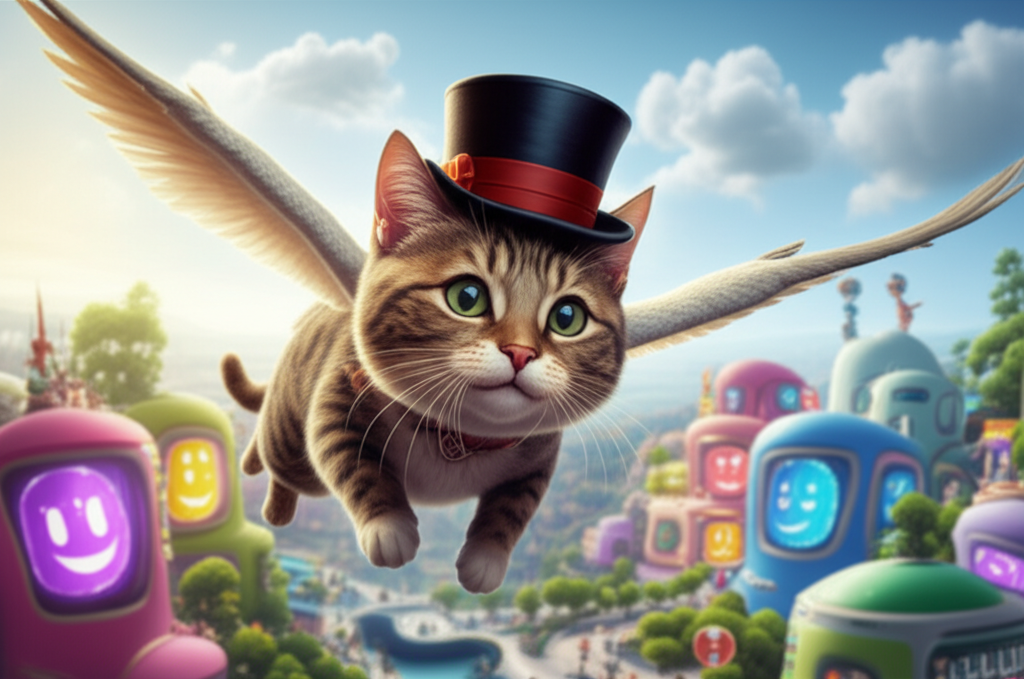

In [83]:
from IPython.display import display
display(image)

In [84]:
from typing import Literal

In [85]:
#@agente_orquestrador.tool_plain(docstring_format='google', require_parameter_descriptions=True,retries=5)
def gera_imagem(descricao: str, n_slide: str) -> str:
    """Gera uma imagem com base na descrição fornecida.

    Args:
        descricao (str): A descrição ou prompt que será usado para gerar a imagem.
        n_slide (str): O número do slide onde a imagem será inserida.

    Returns:
        Image_path: O caminho onde a imagem foi salva

    Exemplo:
        >>> consulta("Gere uma imagem de um gato em ambiente de escritório")
        "slide1.png"
    """
    response = client.models.generate_content(
      model="gemini-2.0-flash-exp-image-generation",
      contents=descricao,
      config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
      )
    )
    for part in response.candidates[0].content.parts:
      if part.text is not None:
        print(part.text)
      elif part.inline_data is not None:
        image = Image.open(BytesIO((part.inline_data.data)))
        image.save(n_slide+'.png')
    Image_path = n_slide+'.png'
    return Image_path